In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.metrics import confusion_matrix
import seaborn as sn
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.utils import plot_model

%matplotlib inline

Data Loading

In [2]:
fashion_data = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
train_jefil ={'images':fashion_data[0][0],'labels':fashion_data[0][1]}

In [4]:
test_jefil ={'images':fashion_data[1][0],'labels':fashion_data[1][1]}

Initial Exploration

In [5]:
#Display (print) the size of the training and testing dataset
print(f'Size of the training dataset {train_jefil["images"].shape[0]}')
print(f'Size of the testing dataset {test_jefil["images"].shape[0]}')

Size of the training dataset 60000
Size of the testing dataset 10000


In [6]:
#Display (print) the image resolution (dimension) of the input images.
print(f'The image resolution (dimension) of the input images is {train_jefil["images"].shape}')

The image resolution (dimension) of the input images is (60000, 28, 28)


In [7]:
#Display (print) the largest pixel value in the dataset using numpy.amax()
print(f'The largest pixel value in the dataset is {np.amax(train_jefil["images"])}')

The largest pixel value in the dataset is 255


Data Pre-processing

In [8]:
#Normalize the pixel values in the dataset to a range between 0-1 using the info identified in Step b. Store result back into train_firstname['images'] and test_firstname['images']

train_int_to_float = train_jefil["images"].astype('float32')
test_int_to_float = test_jefil["images"].astype('float32')

train_jefil["images"] = train_int_to_float/255.0
test_jefil["images"] = test_int_to_float/255.0

In [9]:
#Using tensorflow's build in method to_cateogircal() to one-hot encode the labels. Store results back into train_firstname['labels'] and test_firstname['labels'].

train_jefil['labels'] = tf.keras.utils.to_categorical(train_jefil['labels'],num_classes=10)
test_jefil['labels'] = tf.keras.utils.to_categorical(test_jefil['labels'],num_classes=10)

In [10]:
#Display (print) the shape of the train_firstname['labels'] and test_firstname['labels']
print(f'Shape of train_jefil[\'labels\'] is {train_jefil["labels"].shape}')
print(f'Shape of test_jefil[\'labels\'] is {test_jefil["labels"].shape}')

Shape of train_jefil['labels'] is (60000, 10)
Shape of test_jefil['labels'] is (10000, 10)


Visualization

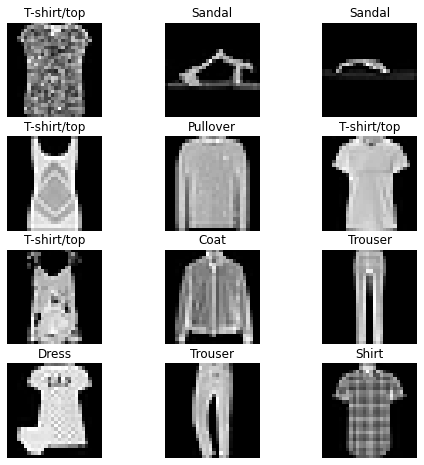

In [11]:
#Create a function that displays (plots) an image with its true label using matplotlib. Remove xticks and yticks when plotting the image.
label_list = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
decoded_labels = tf.math.argmax(train_jefil['labels'],axis=1)


def fig_plot(row,col,i):
    
    i=i
    _, axs = plt.subplots(row,col,figsize=(8,8))  #Using the function created in Step d.1, plot the first 12 data samples in the training dataset using a figure size of 8x8 and a subplot dimension of 4x3
    axs = axs.flatten()
    for ax in axs:
        ax.imshow(train_jefil["images"][i],cmap='gray')
        ax.set_title(label_list[np.asarray(decoded_labels)[i]])
        ax.axis('off')
        i=i+1
    plt.show()

#Calling function to plot first 12 images
fig_plot(4,3,61)


Training Data Preparation

In [12]:
#reshape the dataset to have a single channel
X = train_jefil["images"].reshape((train_jefil["images"].shape[0],28,28,1))
X_test = test_jefil["images"].reshape((test_jefil["images"].shape[0],28,28,1))

In [13]:
#Using Sklearn's train_test_split() method split the training dataset in 80% training and 20% validation.
x_train_jefil,x_val_jefil,y_train_jefil,y_val_jefil = train_test_split(X,train_jefil['labels'],test_size=0.20,random_state=10)

Build, Train and validate CNN Model

In [14]:
cnn_model_jefil = Sequential()
cnn_model_jefil.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
cnn_model_jefil.add(MaxPooling2D(2,2))
cnn_model_jefil.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform'))
cnn_model_jefil.add(MaxPooling2D(2,2))
cnn_model_jefil.add(Flatten())
cnn_model_jefil.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
cnn_model_jefil.add(Dense(10,activation='softmax'))

In [15]:
#Compile the model with 'adam' optimizer, 'cateogrical_crossentropy' loss function, 'accuracy' metric
cnn_model_jefil.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
#Display (print) a summary of the model using summary().
cnn_model_jefil.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 100)               8

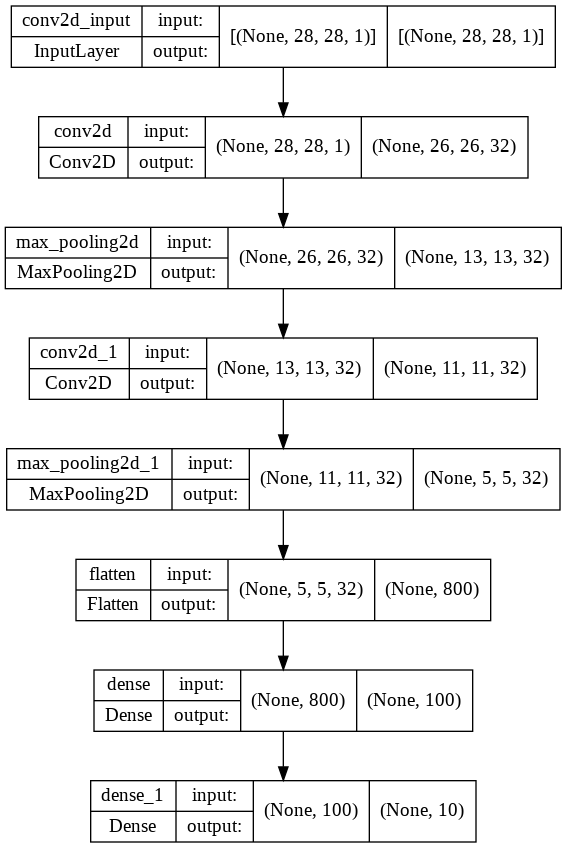

In [17]:
tf.keras.utils.plot_model(cnn_model_jefil, to_file='model_test.png', show_shapes=True, show_layer_names=True)

In [18]:
lyr=0;
for layer in cnn_model_jefil.layers: 
    print(f'layers - {layer.name}')
    if  len(layer.get_weights()) != 0:
         print(type( layer.get_weights()))
         for i in  layer.get_weights():
            print((i.shape))
            
            
    print("********************************************************************")
    lyr=lyr+1

layers - conv2d
<class 'list'>
(3, 3, 1, 32)
(32,)
********************************************************************
layers - max_pooling2d
********************************************************************
layers - conv2d_1
<class 'list'>
(3, 3, 32, 32)
(32,)
********************************************************************
layers - max_pooling2d_1
********************************************************************
layers - flatten
********************************************************************
layers - dense
<class 'list'>
(800, 100)
(100,)
********************************************************************
layers - dense_1
<class 'list'>
(100, 10)
(10,)
********************************************************************


In [19]:
#Using TensorFlow's fit() to train and validate the cnn model with 8 epochs and batch size of 256. Store training/validation results in cnn_history_firstname.
cnn_history_jefil = cnn_model_jefil.fit(x_train_jefil,y_train_jefil,epochs=8,batch_size=256,validation_data=(x_val_jefil,y_val_jefil))

Epoch 1/8
188/188 [==============================] - 46s 238ms/step - loss: 0.6145 - accuracy: 0.7847 - val_loss: 0.4246 - val_accuracy: 0.8491
Epoch 2/8
188/188 [==============================] - 33s 174ms/step - loss: 0.3841 - accuracy: 0.8656 - val_loss: 0.3962 - val_accuracy: 0.8591
Epoch 3/8
188/188 [==============================] - 33s 176ms/step - loss: 0.3376 - accuracy: 0.8809 - val_loss: 0.3614 - val_accuracy: 0.8673
Epoch 4/8
188/188 [==============================] - 35s 188ms/step - loss: 0.3097 - accuracy: 0.8879 - val_loss: 0.3244 - val_accuracy: 0.8861
Epoch 5/8
188/188 [==============================] - 33s 175ms/step - loss: 0.2952 - accuracy: 0.8930 - val_loss: 0.3137 - val_accuracy: 0.8841
Epoch 6/8
188/188 [==============================] - 33s 173ms/step - loss: 0.2704 - accuracy: 0.9017 - val_loss: 0.3186 - val_accuracy: 0.8809
Epoch 7/8
188/188 [==============================] - 32s 172ms/step - loss: 0.2557 - accuracy: 0.9078 - val_loss: 0.2923 - val_accuracy:

Test and analyze the model

In [20]:
cnn_history_jefil.history['accuracy']

[0.7847499847412109,
 0.8656458258628845,
 0.8808541893959045,
 0.8878958225250244,
 0.8930000066757202,
 0.901687502861023,
 0.9077916741371155,
 0.9130416512489319]

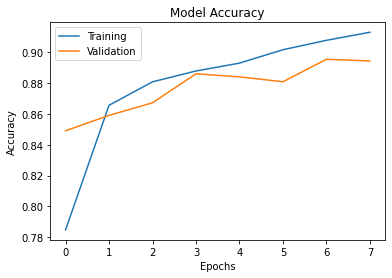

In [21]:
plt.title('Model Accuracy')
plt.plot(cnn_history_jefil.history['accuracy'])
plt.plot(cnn_history_jefil.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training','Validation'], loc='upper left')
plt.show()

In [22]:
#Evaluate the cnn model with the test dataset using Tensorflow's evaluate() and display (Print) the test accuracy.
eval_result = cnn_model_jefil.evaluate(X_test,test_jefil["labels"])

313/313 [==============================] - 3s 9ms/step - loss: 0.2991 - accuracy: 0.8927


In [23]:
eval_result

[0.29912838339805603, 0.8927000164985657]

In [24]:
#Create predictions on the test dataset using TensorFlow's predict(). Name in the predictions cnn_predictions_firstname
cnn_predictions_jefil = cnn_model_jefil.predict(X_test)

In [25]:
#Create a function that plots the probability distribution of the predictions as a histogram using matplotlib. The function takes in the true label of the image and an array with the probability distribution. Probability of true labels are colored in green and predicted labels are colored in blue. Calling the function should produce a plot similar to below
def plot_hist(actual, prediction):
    data =prediction
    positions = np.arange(10)
    plt_bar=plt.bar(positions, data,color='grey')
    plt_bar[np.argmax(prediction,axis=0)].set_color('b')
    plt_bar[actual].set_color('g')
    plt.xticks(positions, ('0', '1', '2', '3','4','5','6','7','8','9'))
    plt.show()

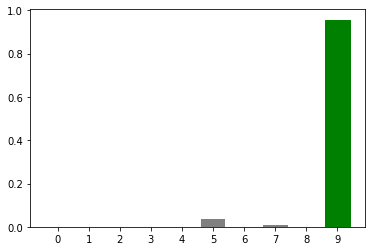

In [26]:
plot_hist(np.asarray(decoded_labels)[0],cnn_predictions_jefil[0])

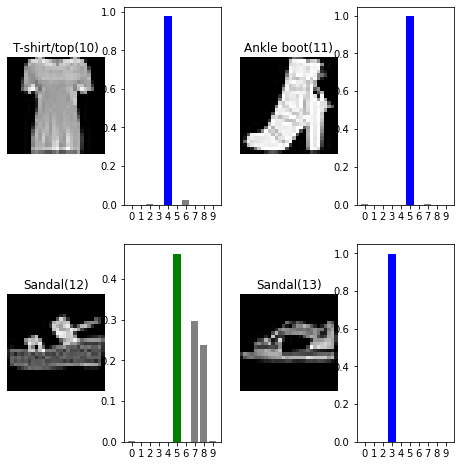

In [27]:
#Using the created function in Step d.1 and g.4. display (plot) the first 4 images from the test dataset starting from the last 2 digits of your student number (i.e. if last 2 digits is 23, then display images 24-27) with their prediction probability distribution.
_,axes = plt.subplots(2,4,figsize=(8,8))
axes = axes.flatten()
j=10
k=0
for ax in axes:
    if k%2 == 0:
        ax.imshow(train_jefil["images"][j],cmap='gray')
        ax.set_title(label_list[np.asarray(decoded_labels)[j]]+"("+str(j)+")")
        ax.axis('off')
        k=k+1
    else:
        data =cnn_predictions_jefil[j]
        positions = np.arange(10)
        plt_bar=ax.bar(positions, data,color='grey')
        plt_bar[np.argmax(data,axis=0)].set_color('b')
        plt_bar[np.asarray(decoded_labels)[j]].set_color('g')
        ax.set_xticks(positions)
        j=j+1
        k=k+1
        
plt.show()

In [28]:
np.asarray(decoded_labels)[0],cnn_predictions_jefil[0]

(9, array([9.3885665e-06, 1.3952199e-06, 9.5948353e-06, 2.9428594e-07,
        9.9606787e-06, 3.5547752e-02, 2.0467214e-06, 7.5837802e-03,
        2.8800764e-04, 9.5654774e-01], dtype=float32))

In [29]:
np.asarray(decoded_labels)[61]
student_number =10
for i in range(4):
    student_number=student_number+1
    print(f'The actual test data for the position {student_number} is {label_list[np.asarray(decoded_labels)[student_number]]}')
    print(f'The predicted value for the position  {student_number} is {label_list[np.argmax(cnn_predictions_jefil[student_number],axis=0)]} ')
    

The actual test data for the position 11 is Ankle boot
The predicted value for the position  11 is Sandal 
The actual test data for the position 12 is Sandal
The predicted value for the position  12 is Sandal 
The actual test data for the position 13 is Sandal
The predicted value for the position  13 is Dress 
The actual test data for the position 14 is Sneaker
The predicted value for the position  14 is Coat 


In [30]:
test_jefil["labels"]

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
decoded_actual_labels = tf.math.argmax(test_jefil['labels'],axis=1)
test_actual=np.asarray(decoded_actual_labels)

In [32]:
len(test_actual)

10000

In [33]:
predicted_values=[]
for i in range(len(cnn_predictions_jefil)):
    predicted_values.append(np.argmax(cnn_predictions_jefil[i],axis=0))
predicted_values = np.asarray(predicted_values)

In [34]:
#Display (plot) the confusion matrix of the test prediction using matplotlib, seaborn, and sklearn's confusion matrix
cm = confusion_matrix(test_actual,predicted_values)

In [35]:
confusion_matrix_percentage_data=cm / cm.astype(float).sum(axis=1)

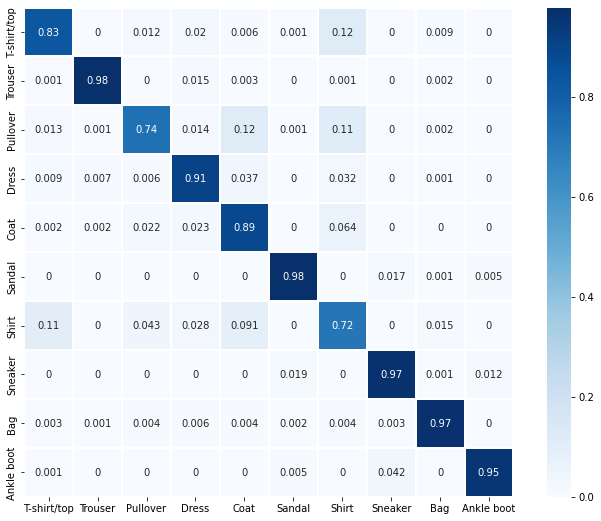

In [36]:
plt.figure(figsize=(12, 9))

sn.heatmap(confusion_matrix_percentage_data,annot=True, cmap='Blues',xticklabels=label_list, yticklabels=label_list, square=1, linewidth=1.)

Build, Train and validate RNN Model

In [55]:
rnn_model_jefil = Sequential()
rnn_model_jefil.add(LSTM(256,input_shape=(28,28),activation='relu',return_sequences=True ))
rnn_model_jefil.add(Dropout(0.2))
rnn_model_jefil.add(LSTM(128,activation='relu'))
rnn_model_jefil.add(Dropout(0.2))

rnn_model_jefil.add(Dense(10,activation='softmax'))

rnn_model_jefil.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [56]:
rnn_history_jefil = rnn_model_jefil.fit(x_train_jefil,y_train_jefil,epochs=8,batch_size=256,validation_data=(x_val_jefil,y_val_jefil))

Epoch 1/8
188/188 [==============================] - 127s 663ms/step - loss: 0.9468 - accuracy: 0.6556 - val_loss: 0.5879 - val_accuracy: 0.7812
Epoch 2/8
188/188 [==============================] - 124s 659ms/step - loss: 0.5172 - accuracy: 0.8120 - val_loss: 0.4520 - val_accuracy: 0.8373
Epoch 3/8
188/188 [==============================] - 123s 655ms/step - loss: 0.4252 - accuracy: 0.8457 - val_loss: 0.4187 - val_accuracy: 0.8458
Epoch 4/8
188/188 [==============================] - 124s 658ms/step - loss: 0.3834 - accuracy: 0.8582 - val_loss: 0.3899 - val_accuracy: 0.8507
Epoch 5/8
188/188 [==============================] - 123s 652ms/step - loss: 0.3544 - accuracy: 0.8689 - val_loss: 0.3528 - val_accuracy: 0.8678
Epoch 6/8
188/188 [==============================] - 123s 654ms/step - loss: 0.3335 - accuracy: 0.8753 - val_loss: 0.3545 - val_accuracy: 0.8669
Epoch 7/8
188/188 [==============================] - 125s 663ms/step - loss: 0.3332 - accuracy: 0.8777 - val_loss: 0.3397 - val_ac

In [57]:
rnn_model_jefil.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 28, 256)           291840    
                                                                 
 dropout_2 (Dropout)         (None, 28, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 490,250
Trainable params: 490,250
Non-trainable params: 0
_________________________________________________________________


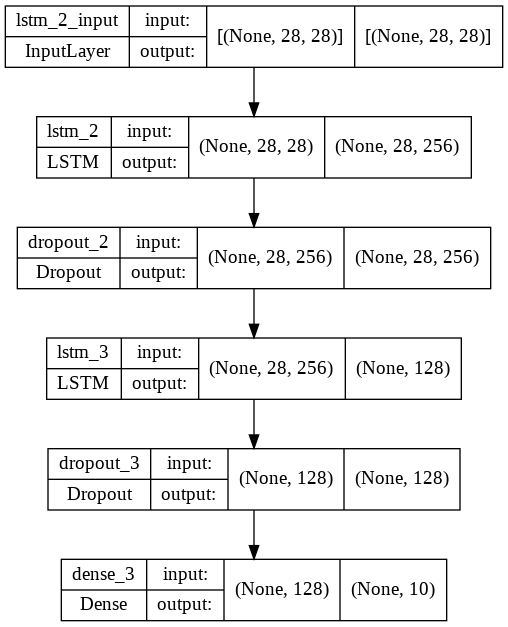

In [58]:
tf.keras.utils.plot_model(rnn_model_jefil, to_file='rnn_model_test.png', show_shapes=True, show_layer_names=True)

In [59]:
lyr=0;
for layer in rnn_model_jefil.layers: 
    print(f'layers - {layer.name}')
    if  len(layer.get_weights()) != 0:
         print(type( layer.get_weights()))
         for i in  layer.get_weights():
            print((i.shape))
            
            
    print("********************************************************************")
    lyr=lyr+1

layers - lstm_2
<class 'list'>
(28, 1024)
(256, 1024)
(1024,)
********************************************************************
layers - dropout_2
********************************************************************
layers - lstm_3
<class 'list'>
(256, 512)
(128, 512)
(512,)
********************************************************************
layers - dropout_3
********************************************************************
layers - dense_3
<class 'list'>
(128, 10)
(10,)
********************************************************************


In [60]:
rnn_history_jefil.history['accuracy']

[0.6555833220481873,
 0.8119791746139526,
 0.8456666469573975,
 0.8581666946411133,
 0.8689374923706055,
 0.875333309173584,
 0.8776666522026062,
 0.8837291598320007]

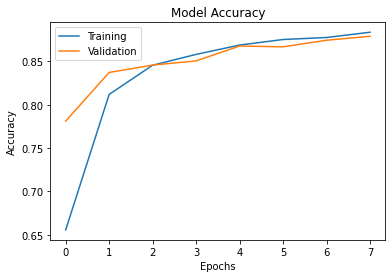

In [61]:
plt.title('Model Accuracy')
plt.plot(rnn_history_jefil.history['accuracy'])
plt.plot(rnn_history_jefil.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training','Validation'], loc='upper left')
plt.show()

In [62]:
eval_result = rnn_model_jefil.evaluate(X_test,test_jefil["labels"])

313/313 [==============================] - 15s 48ms/step - loss: 0.3369 - accuracy: 0.8752


In [63]:
rnn_predictions_jefil = rnn_model_jefil.predict(X_test)

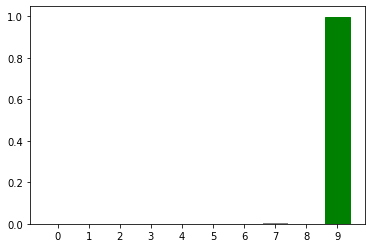

In [64]:
plot_hist(np.asarray(decoded_labels)[0],rnn_predictions_jefil[0])

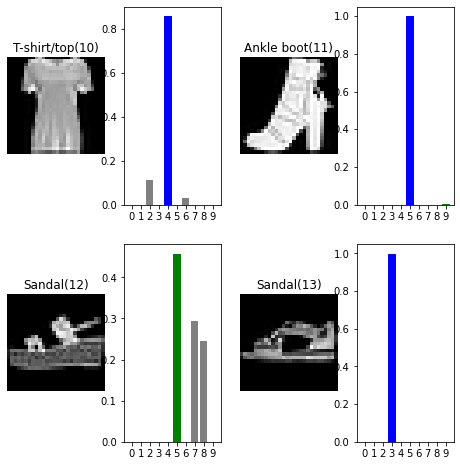

In [65]:
_,axes = plt.subplots(2,4,figsize=(8,8))
axes = axes.flatten()
j=10
k=0
for ax in axes:
    if k%2 == 0:
        ax.imshow(train_jefil["images"][j],cmap='gray')
        ax.set_title(label_list[np.asarray(decoded_labels)[j]]+"("+str(j)+")")
        ax.axis('off')
        k=k+1
    else:
        data =rnn_predictions_jefil[j]
        positions = np.arange(10)
        plt_bar=ax.bar(positions, data,color='grey')
        plt_bar[np.argmax(data,axis=0)].set_color('b')
        plt_bar[np.asarray(decoded_labels)[j]].set_color('g')
        ax.set_xticks(positions)
        j=j+1
        k=k+1
        
plt.show()
    

In [66]:
student_number =10
for i in range(4):
    student_number=student_number+1
    print(f'The actual test data for the position {student_number} is {label_list[np.asarray(decoded_labels)[student_number]]}')
    print(f'The predicted value for the position  {student_number} is {label_list[np.argmax(rnn_predictions_jefil[student_number],axis=0)]} ')
    

The actual test data for the position 11 is Ankle boot
The predicted value for the position  11 is Sandal 
The actual test data for the position 12 is Sandal
The predicted value for the position  12 is Sandal 
The actual test data for the position 13 is Sandal
The predicted value for the position  13 is Dress 
The actual test data for the position 14 is Sneaker
The predicted value for the position  14 is Coat 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


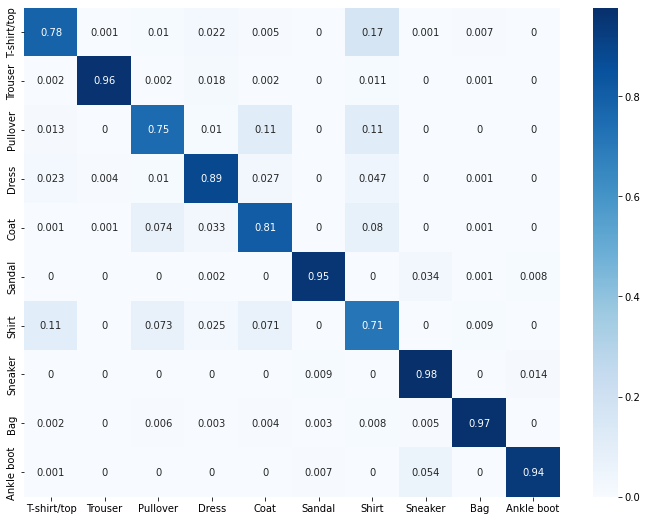

In [67]:
rnn_predicted_values=[]
for i in range(len(rnn_predictions_jefil)):
    rnn_predicted_values.append(np.argmax(rnn_predictions_jefil[i],axis=0))
rnn_predicted_values = np.asarray(rnn_predicted_values)    

rnn_cm = confusion_matrix(test_actual,rnn_predicted_values)
rnn_confusion_matrix_percentage_data=rnn_cm / rnn_cm.astype(np.float).sum(axis=1)

plt.figure(figsize=(12, 9))

sn.heatmap(rnn_confusion_matrix_percentage_data,annot=True, cmap='Blues',xticklabels=label_list, yticklabels=label_list)